# Characterization of Clades based on k-mers

In [1]:
from upsetplot import (
    generate_counts,
    plot,
)

from matplotlib import pyplot

In [2]:
example=generate_counts()
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

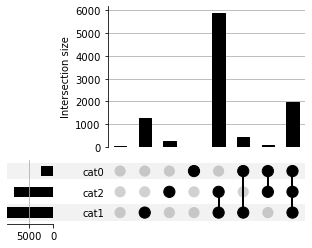

In [4]:
plot(example)
pyplot.show()

### load k-mer importance

In [6]:
from pathlib import Path
import pandas as pd

In [52]:
paths_kmerimportance = list(Path("avg-results-nextclade-comparison/").rglob("*csv"))
paths_kmerimportance

[PosixPath('avg-results-nextclade-comparison/GK/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/GH/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/V/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/S/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/L/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/GR/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/G/kmer_importance.csv'),
 PosixPath('avg-results-nextclade-comparison/GV/kmer_importance.csv')]

In [59]:
list_df = []
list_presence = []
list_absence  = []
for path in paths_kmerimportance:
    df = pd.read_csv(path)
    df["clade"] = str(path).split("/")[1]
    list_df.append(df)
    
    list_presence.append(df.query("`freq`>0.1"))
    list_absence.append(df.query("`freq`<=0.1"))

In [60]:
kmer_presence = pd.concat(list_presence,axis=0)
kmer_absence = pd.concat(list_absence,axis=0)

In [67]:
kmer_absence

,Unnamed: 0,kmer,row,col,grad,freq,clade
0,0,CCAACTTC,96,108,0.907642,0.000413,GH
1,1,CGAACTTC,98,108,0.763128,0.000000,GH
3,3,GTAAACGA,67,158,0.632327,0.000413,GH
6,6,TCCACTTC,97,105,0.546128,0.000207,GH
9,9,GGTGGATC,95,100,0.445468,0.000207,GH
...,...,...,...,...,...,...,...
7,7,GGATCGGT,235,140,0.223311,0.000000,GV
8,8,GGAGAGGT,235,148,0.221477,0.000201,GV
9,9,TAGTCGGT,237,139,0.210926,0.000403,GV
10,10,TCCGAGGT,233,145,0.207770,0.000000,GV


In [16]:
kmer_importance = pd.concat(list_df,axis=0)

In [17]:
kmer_importance.head()

,Unnamed: 0,kmer,row,col,grad,freq,clade
0,0,GCAAACCT,129.0,156.0,0.998726,1.980707,GK
1,1,TCAAACCT,129.0,157.0,0.389528,1.002437,GK
2,2,GTAAACCT,131.0,158.0,0.306636,2.987815,GK
0,0,CCAACTTC,96.0,108.0,0.907642,0.000413,GH
1,1,CGAACTTC,98.0,108.0,0.763128,0.000000,GH


In [23]:
highest_grad = kmer_importance.query("`grad`>0.5")#.groupby("kmer").size()

In [38]:
kmer_hotencode = pd.get_dummies(highest_grad["clade"])

In [39]:
df_upset_kmer = pd.concat([highest_grad,kmer_hotencode], axis=1)
df_upset_kmer.head()

,Unnamed: 0,kmer,row,col,grad,freq,clade,G,GH,GK,GR,GV,L,S,V
0,0,GCAAACCT,129.0,156.0,0.998726,1.980707,GK,0,0,1,0,0,0,0,0
0,0,CCAACTTC,96.0,108.0,0.907642,0.000413,GH,0,1,0,0,0,0,0,0
1,1,CGAACTTC,98.0,108.0,0.763128,0.000000,GH,0,1,0,0,0,0,0,0
2,2,TCATAGCG,169.0,29.0,0.660175,0.994211,GH,0,1,0,0,0,0,0,0
3,3,GTAAACGA,67.0,158.0,0.632327,0.000413,GH,0,1,0,0,0,0,0,0


In [48]:
df_upset_kmer.groupby(["kmer","clade"]).agg("count")

Unnamed: 0  row  col  grad  freq  G  GH  GK  GR  GV  L  S  V
kmer     clade                                                              
CCAACTTC GH              1    1    1     1     1  1   1   1   1   1  1  1  1
CGAACTTC GH              1    1    1     1     1  1   1   1   1   1  1  1  1
GCAAACCT G               1    1    1     1     1  1   1   1   1   1  1  1  1
         GK              1    1    1     1     1  1   1   1   1   1  1  1  1
GGAACTTC GH              1    1    1     1     1  1   1   1   1   1  1  1  1
GGATGTTA G               1    1    1     1     1  1   1   1   1   1  1  1  1
GTAAACGA GH              1    1    1     1     1  1   1   1   1   1  1  1  1
         GR              1    1    1     1     1  1   1   1   1   1  1  1  1
GTAAAGAG L               1    1    1     1     1  1   1   1   1   1  1  1  1
GTACAGAG L               1    1    1     1     1  1   1   1   1   1  1  1  1
TACACTTC GH              1    1    1     1     1  1   1   1   1   1  1  1  1
TACCGGTA L               1    1    1     1     1  1   1   1   1   1  1  1  1
TCATAGCG GH              1    1    1     1     1  1   1   1   1   1  1  1  1
         L               1    1    1     1     1  1   1   1   1   1  1  1  1
TCCACTTC GH              1    1    1     1     1  1   1   1   1   1  1  1  1
TGTTCACC S               1    1    1     1     1  1   1   1   1   1  1  1  1
TTACCGGT V               1    1    1     1     1  1   1   1   1   1  1  1  1
TTAGTCAG L               1    1    1     1     1  1   1   1   1   1  1  1  1
TTGTATGA L               1    1    1     1     1  1   1   1   1   1  1  1  1
TTTTATGA L               1    1    1     1     1  1   1   1   1   1  1  1  1
TTTTCGGT G               1    1    1     1     1  1   1   1   1   1  1  1  1
         GV              1    1    1     1     1  1   1   1   1   1  1  1  1
         L               1    1    1     1     1  1   1   1   1   1  1  1  1
         V               1    1    1     1     1  1   1   1   1   1  1  1  1
TTTTTCAG L               1    1    1     1     1  1   1   1   1   1  1  1  1

In [37]:
list_kmer = kmer_hotencode.columns.tolist()
list_groupby=["clade"]
list_groupby.extend(list_kmer)
count = df_upset_kmer.groupby(list_groupby).size()
count

clade  CCAACTTC  CGAACTTC  GCAAACCT  GGAACTTC  GGATGTTA  GTAAACGA  GTAAAGAG  GTACAGAG  TACACTTC  TACCGGTA  TCATAGCG  TCCACTTC  TGTTCACC  TTACCGGT  TTAGTCAG  TTGTATGA  TTTTATGA  TTTTCGGT  TTTTTCAG
G      0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0           1
                                               1         0         0         0         0         0         0         0         0         0         0         0         0         0         0           1
                           1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0           1
GH     0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0           1


In [49]:
plot(count)
pyplot.show()

ValueError: The DataFrame has values in its index that are not boolean